# 相互作用特徴量

In [ ]:
"""
相互作用特徴量は２つ以上の変数を掛け合わせた新しい変数を作ること
→ペアワイズ交互作用特徴量

メリット
・目的変数をうまく表現できて、モデルの精度が高まる

デメリット
・元がn個の場合、特徴量の生成後はn^2個になるので、学習コストが増大する。

"""

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def learning(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #評価
    print('Accuaracy = ', accuracy_score(y_true=y_test, y_pred=y_pred).round(decimals=3))
    print('Precision = ', precision_score(y_true=y_test, y_pred=y_pred).round(decimals=3))
    print('Recall = ', recall_score(y_true=y_test, y_pred=y_pred).round(decimals=3))
    print('F1 score = ', f1_score(y_true=y_test, y_pred=y_pred).round(decimals=3))
    print('='*20)
    
    
    #混同行列
    matrix = plot_confusion_matrix(y_pred, y_test)
    return matrix

def plot_confusion_matrix(predict, y_test):
    pred = np.where(predict > 0.5, 1, 0)
    cm = confusion_matrix(y_test, pred)
    matrix = pd.DataFrame(cm)
    matrix.columns = [['予想_負例(0)', '予想_正例(1)']]
    matrix.index = [['実際_負例(0)', '実際_正例(1)']]
    return matrix


#特徴量選択
df = pd.read_csv('csv/Churn_Modelling.csv')
interaction  = df.copy()
features = ['Balance', 'CreditScore']
X1 = interaction[features]
y = interaction['Exited']


#ペアワイズ交互作用特徴量
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X1)
print(f'生成前の列数: {X1.shape[1]}')
print(f'生成後の列数: {X2.shape[1]}')
print('='*20)

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.3, random_state=42)

matrix1 = learning(X1_train, X1_test, y_train, y_test)
matrix2 = learning(X2_train, X2_test, y_train, y_test)
matrix1
matrix2

生成前の列数: 2
生成後の列数: 5
Accuaracy =  0.761
Precision =  0.256
Recall =  0.12
F1 score =  0.163
Accuaracy =  0.761
Precision =  0.261
Recall =  0.125
F1 score =  0.169


,予想_負例(0),予想_正例(1)
実際_負例(0),2209,207
実際_正例(1),511,73


In [8]:
matrix2

,予想_負例(0),予想_正例(1)
実際_負例(0),2209,207
実際_正例(1),511,73


# 特徴量選択

In [ ]:
"""
多数の特徴量の中から、目的とする予想に関連が強い特徴量を取捨選択する

メリット
・予想誤差を最小にして、汎化性能を向上させる。
・モデルによる推論結果を人間が理解できて、根拠を説明可能になる。
・モデルのデバックや精度改善の際に説明変数のチェックが容易になる。
・エラー解析の根拠が明確化
・処理コストの削減
"""

In [29]:
import pandas as pd

wine_red = pd.read_csv('csv/winequality-red.csv')
wine_red.columns = ['固定酸度', '揮発性酸性度', 'クエン酸', '残留糖分', '塩化物', '遊離二酸化硫黄', '総二酸化硫黄', '密度', 'pH', '硫黄塩', 'アルコール', '品質']

# wine_red = wine_red.round().astype(int)
wine_red.head()

,固定酸度,揮発性酸性度,クエン酸,残留糖分,塩化物,遊離二酸化硫黄,総二酸化硫黄,密度,pH,硫黄塩,アルコール,品質
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
"""
アプローチ
・統計量を用いた特徴量選択
・反復特徴量選択
・手法ベース特徴量選択法

"""

## 統計量を用いた特徴量選択

array([[<AxesSubplot:xlabel='固定酸度', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='揮発性酸性度', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='クエン酸', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='残留糖分', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='塩化物', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='遊離二酸化硫黄', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='総二酸化硫黄', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='密度', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='pH', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='硫黄塩', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='アルコール', ylabel='固定酸度'>,
        <AxesSubplot:xlabel='品質', ylabel='固定酸度'>],
       [<AxesSubplot:xlabel='固定酸度', ylabel='揮発性酸性度'>,
        <AxesSubplot:xlabel='揮発性酸性度', ylabel='揮発性酸性度'>,
        <AxesSubplot:xlabel='クエン酸', ylabel='揮発性酸性度'>,
        <AxesSubplot:xlabel='残留糖分', ylabel='揮発性酸性度'>,
        <AxesSubplot:xlabel='塩化物', ylabel='揮発性酸性度'>,
        <AxesSubplot:xlabel='遊離二酸化硫黄', ylabel='揮発性酸性度'>,
        <AxesSubplot:xlabel='総二酸化硫黄', ylabel='揮

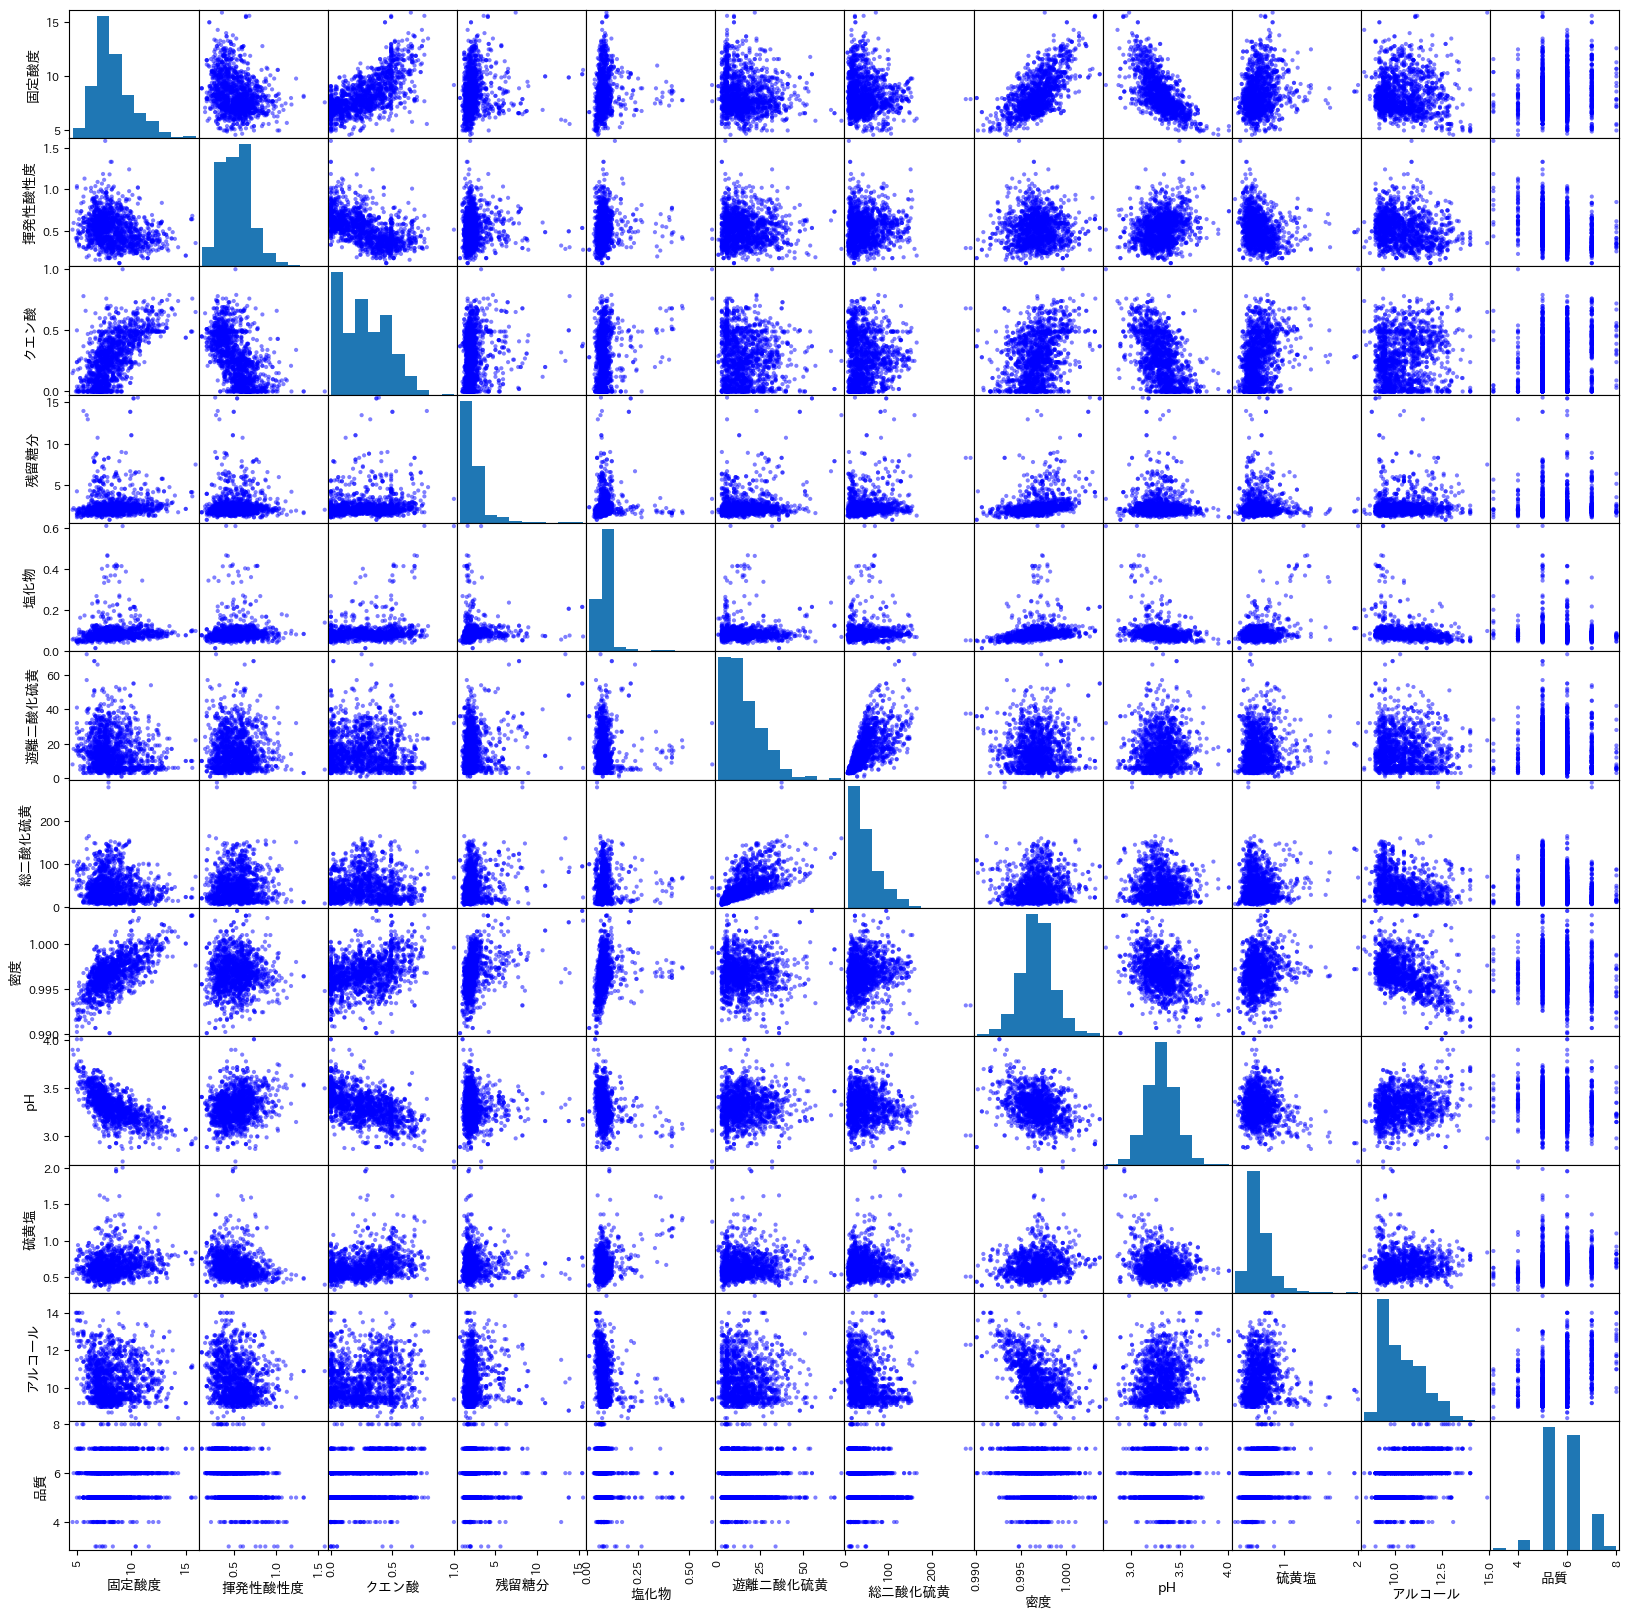

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

pd.plotting.scatter_matrix(wine_red, c='b', figsize=(20, 20))
# sns.pairplot(wine_red)

In [ ]:
"""
ピアソン積率相関係数

母集団が正規分布を仮定した場合の手法
線形な関係があるかどうかで確認できる -> まずデータの外形をグラフで確認してから相関係数を求めると良い

メリット
データの大小関係を考慮できるから、間隔尺度、比率尺度の状態を保持して関係性を考察できる。

デメリット
外れ値の影響を強く受ける　->外れ値の処理か、順位相関係数を行う

"""

In [31]:
#ピアソン積率相関係数

pearson = wine_red.corr(method='pearson')
pr_corr_df = pearson.round(decimals=3).astype(str)
pr_corr_df

,固定酸度,揮発性酸性度,クエン酸,残留糖分,塩化物,遊離二酸化硫黄,総二酸化硫黄,密度,pH,硫黄塩,アルコール,品質
固定酸度,1.0,-0.256,0.672,0.115,0.094,-0.154,-0.113,0.668,-0.683,0.183,-0.062,0.124
揮発性酸性度,-0.256,1.0,-0.552,0.002,0.061,-0.011,0.076,0.022,0.235,-0.261,-0.202,-0.391
クエン酸,0.672,-0.552,1.0,0.144,0.204,-0.061,0.036,0.365,-0.542,0.313,0.11,0.226
残留糖分,0.115,0.002,0.144,1.0,0.056,0.187,0.203,0.355,-0.086,0.006,0.042,0.014
塩化物,0.094,0.061,0.204,0.056,1.0,0.006,0.047,0.201,-0.265,0.371,-0.221,-0.129
遊離二酸化硫黄,-0.154,-0.011,-0.061,0.187,0.006,1.0,0.668,-0.022,0.07,0.052,-0.069,-0.051
総二酸化硫黄,-0.113,0.076,0.036,0.203,0.047,0.668,1.0,0.071,-0.066,0.043,-0.206,-0.185
密度,0.668,0.022,0.365,0.355,0.201,-0.022,0.071,1.0,-0.342,0.149,-0.496,-0.175
pH,-0.683,0.235,-0.542,-0.086,-0.265,0.07,-0.066,-0.342,1.0,-0.197,0.206,-0.058
硫黄塩,0.183,-0.261,0.313,0.006,0.371,0.052,0.043,0.149,-0.197,1.0,0.094,0.251


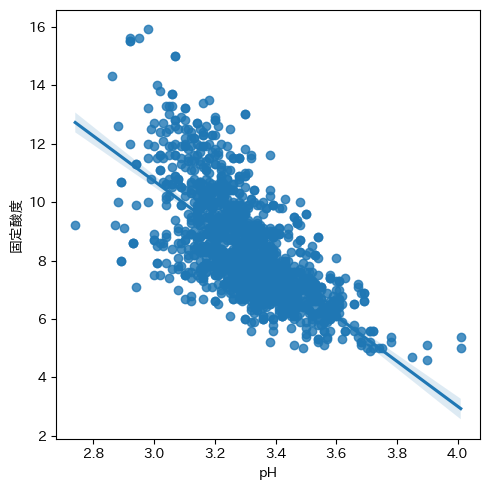

In [34]:
#二変数を描画

plt.figure(figsize=(5,5))
sns.regplot(x=wine_red['pH'], y=wine_red['固定酸度'])
plt.tight_layout()
plt.show()

In [ ]:
"""
スピアマン順位相関係数
各変量を順位に変換してピアソンの積率相関係数を求めたもの
端的に一緒に変化するかどうかを確認

メリット
母集団分布の仮定がいらないため、多くのデータに対して有効
順位づけするため、外れ値の影響を受けない

デメリット
元々あった大小関係が失われる　-> 順序尺度のデータに対して有効な手段（間隔尺度、比率尺度でなく）

"""

In [37]:
# スピアマン順位相関係数

spearman = wine_red.corr(method='spearman')
sp_corr_df = spearman.round(decimals=3).astype(str)
sp_corr_df

,固定酸度,揮発性酸性度,クエン酸,残留糖分,塩化物,遊離二酸化硫黄,総二酸化硫黄,密度,pH,硫黄塩,アルコール,品質
固定酸度,1.0,-0.278,0.662,0.221,0.251,-0.175,-0.088,0.623,-0.707,0.213,-0.067,0.114
揮発性酸性度,-0.278,1.0,-0.61,0.032,0.159,0.021,0.094,0.025,0.234,-0.326,-0.225,-0.381
クエン酸,0.662,-0.61,1.0,0.176,0.113,-0.076,0.009,0.352,-0.548,0.331,0.096,0.213
残留糖分,0.221,0.032,0.176,1.0,0.213,0.075,0.145,0.422,-0.09,0.038,0.117,0.032
塩化物,0.251,0.159,0.113,0.213,1.0,0.001,0.13,0.411,-0.234,0.021,-0.285,-0.19
遊離二酸化硫黄,-0.175,0.021,-0.076,0.075,0.001,1.0,0.79,-0.041,0.116,0.046,-0.081,-0.057
総二酸化硫黄,-0.088,0.094,0.009,0.145,0.13,0.79,1.0,0.129,-0.01,-0.001,-0.258,-0.197
密度,0.623,0.025,0.352,0.422,0.411,-0.041,0.129,1.0,-0.312,0.161,-0.462,-0.177
pH,-0.707,0.234,-0.548,-0.09,-0.234,0.116,-0.01,-0.312,1.0,-0.08,0.18,-0.044
硫黄塩,0.213,-0.326,0.331,0.038,0.021,0.046,-0.001,0.161,-0.08,1.0,0.207,0.377


<AxesSubplot:>

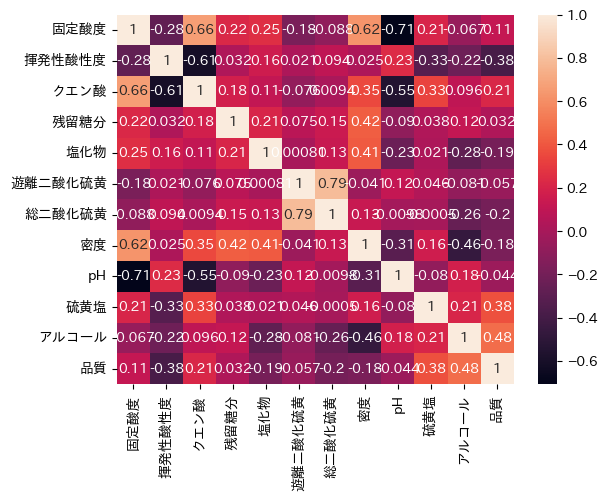

In [40]:
sns.heatmap(spearman, annot=True)

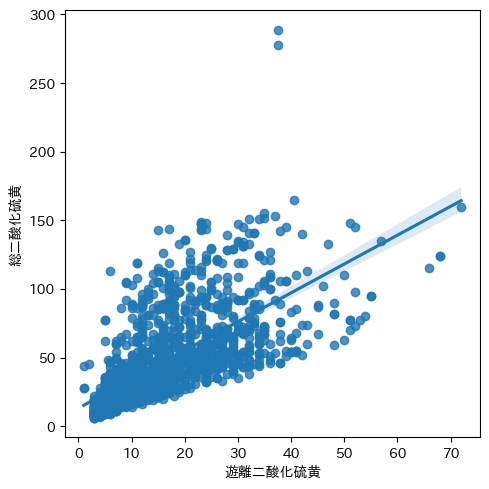

In [41]:
#二変数を描画

plt.figure(figsize=(5,5))
sns.regplot(x=wine_red['遊離二酸化硫黄'], y=wine_red['総二酸化硫黄'])
plt.tight_layout()
plt.show()

## 相関係数の優位性の検定

In [47]:
# 平均と分散
ph_mean = np.mean(wine_red['pH'])
ph_var = np.var(wine_red['pH'])
ph_std = np.std(wine_red['pH'])

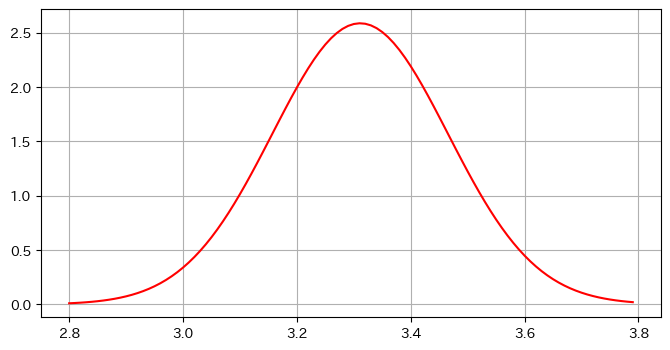

<AxesSubplot:xlabel='pH', ylabel='Count'>

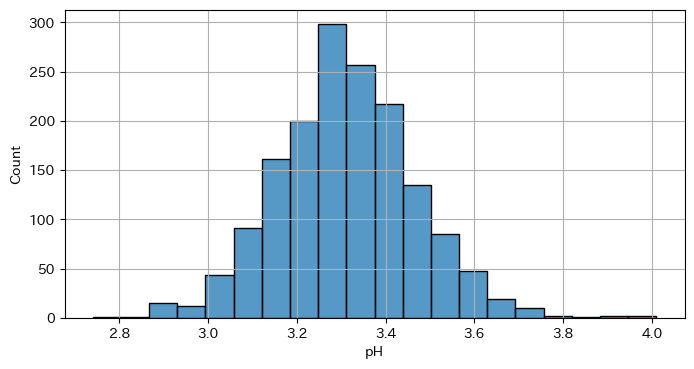

In [52]:
from scipy.stats import norm

#平均値から約2標準偏差の値をX軸にとる
X = np.arange(2.8, 3.8, 0.01)
y = norm.pdf(X, ph_mean, ph_std)

# 正規分布をプロット
plt.figure(figsize=[8,4])
plt.plot(X,y,color='r')
plt.grid()
plt.show()


plt.figure(figsize=[8,4])
plt.grid()
sns.histplot(wine_red['pH'], bins=20)

In [ ]:
#QQプロット
"""
QQプロット
正規分布の累積分布関数を用いる方法

累積分布の25%と75%点を結んで、直線上にデータが分布するかを確認することで、正規分布と近似するか判断

"""

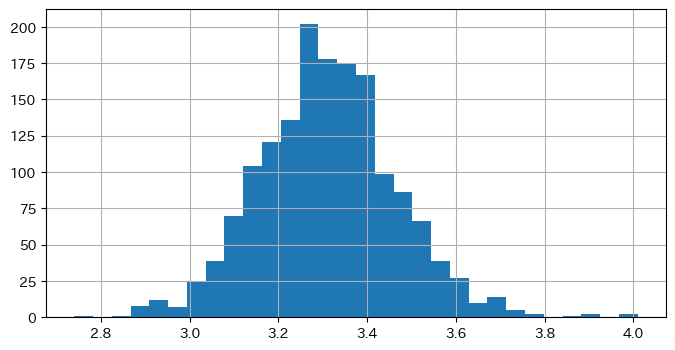

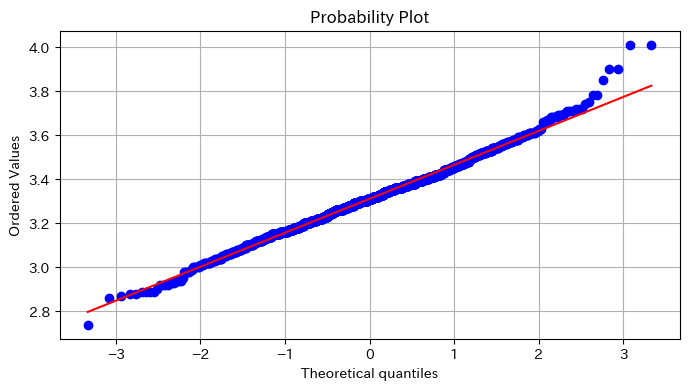

In [67]:
import scipy.stats as stats

def qqplot(dist):
    plt.figure(figsize=[8,4])
    plt.hist(dist, bins=30)
    plt.grid()
    plt.show()

    plt.figure(figsize=[8,4])
    
    #dist:比較対象の理論分布を指定, plot:プロットオブジェクトの指定
    stats.probplot(dist, dist="norm", plot=plt)
    plt.grid()
    plt.show()
    

qqplot(wine_red['pH'])

## 無相関検定

In [73]:
from scipy.stats import pearsonr, spearmanr

ph = wine_red['pH'].values
density = wine_red['密度'].values

#ピアソン相関係数とp値
result = pearsonr(ph, density)
r_value = result[0]
p_value = result[1]

print('相関係数：', r_value)
print('p値：', p_value)

print('='*30)

#スピアマン相関係数とp値
result2 = spearmanr(ph, density)
r_value2 = result2[0]
p_value2 = result2[1]
print('相関係数：', r_value2)
print('p値：', p_value2)

"""
どちらの相関係数でもp<0.05なので相関あり

注意点
・選択した特徴量と相関係数が高い他の特徴量がある場合
->片方削除、交互作用特徴量の作成、ビニングで二変量の統計量の統計量を生成する。

"""


相関係数： -0.3416993347850309
p値： 5.117102011976948e-45
相関係数： -0.31205507820838724
p値： 1.882938603579213e-37


## 反復特徴量選択法

In [ ]:
"""
説明変数を増やしたり減らしたりを繰り返して予測精度を推し量りながら特徴量を選択する。
->特徴量の事前選択で、相関関係の有無、強さを推定済みであることが望ましい


変数増加法（前方選択法）
求められた特徴量重要度の高いものから一つずつ特徴量をデータセットから追加し、予測精度を測る手法

変数減少法（後方削除法）
求められた特徴量重要度の低いものから一つずつ特徴量をデータセットから取り除く


メリット
・どんな回帰分析手法とも組み合わせることができる
・シンプルな手法

デメリット
・回帰モデルの構築を繰り返す回数次第で、処理コストが増大する

"""

In [84]:
#減数減少法
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.preprocessing import normalize

X = wine_red.drop(columns='品質', axis=1)
y = wine_red['品質']

X_norm = normalize(X, norm='l2')
rfe = RFE(estimator=linear_model.LinearRegression(), n_features_to_select=5)
rfe.fit(X_norm, y)
rfe_features = pd.DataFrame(X_norm, columns=wine_red.columns[:-1]).loc[:, rfe.get_support()].columns.tolist()

print(f'重要度が上位5件の特徴量： {rfe_features}')

重要度が上位5件の特徴量： ['揮発性酸性度', '塩化物', '密度', 'pH', '硫黄塩']


# 手法ベース特徴量選択法

In [ ]:
"""
1.決定木ベース
各特徴量を外した時に予測精度（正解率）がどれくらい悪化するかを求めて、その差で重要度を推定する方法

"""

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


X = wine_red.drop(columns='品質', axis=1)
y = wine_red['品質']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#モデリング
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

#評価
accu = accuracy_score(y_test, y_pred)
print('accuracy = {:>.4f}'.format(accu))

#--------------------------
#重量度
fimp = clf_rf.feature_importances_

imp_df = pd.DataFrame()
imp_df['項目名'] = wine_red.columns[:-1]
imp_df['重要度'] = fimp.round(decimals=4).astype(str)
imp_df.sort_values(by='重要度', ascending=False)


accuracy = 0.7375


,項目名,重要度
10,アルコール,0.142
9,硫黄塩,0.1142
1,揮発性酸性度,0.1075
6,総二酸化硫黄,0.1024
7,密度,0.0917
4,塩化物,0.0811
0,固定酸度,0.0779
8,pH,0.073
2,クエン酸,0.0725
3,残留糖分,0.0712


In [ ]:
"""
勾配ブースティング(XGBoost, LightGBM)
２つの方法がある。
・モデル学習の際、その特徴量が使用された回数(split)
・その特徴量が使用される分岐から、どれくらいトレーニングデータに対して損失関数を小さくできたかの幅(gain)
XGBoostはsplitなし

メリット
・計算仮定を可視化できる

デメリット
・特徴量同士で相関の強い変数が含まれる場合、重要度が低く出やすい

"""

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:40:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:40:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

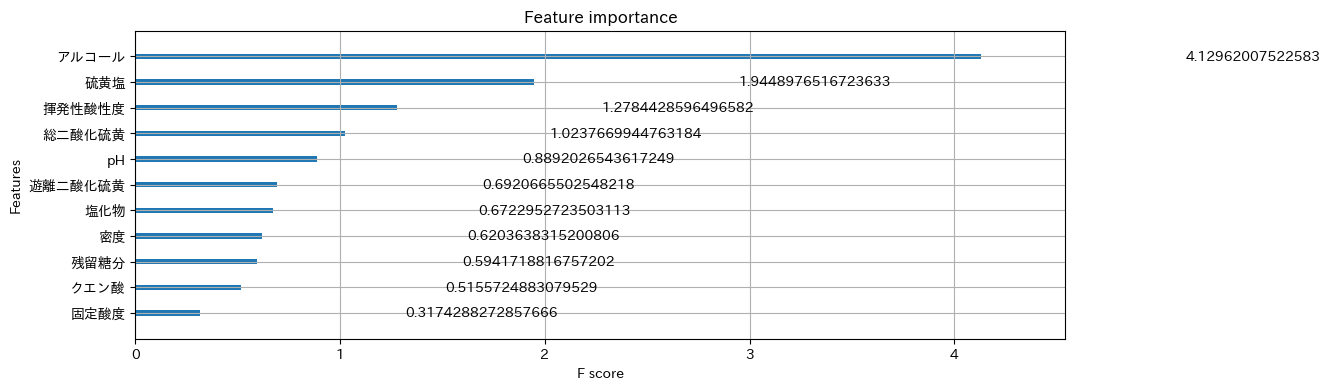

In [95]:
import xgboost as xgb

X = wine_red.drop(columns='品質', axis=1)
y = wine_red['品質']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#パラメータ
xgb_params = {'objective':'reg:linear', 'eta':0.1, 'max_depth':6, 'silent':1}
num_rounds = 100

# XGBoost用データセット
dtrain = xgb.DMatrix(X_train, label=y_train)

#学習
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

#重要度
_, ax = plt.subplots(figsize=(12, 4))

#gain:予想精度がどれくらい改善されたかの平均
xgb.plot_importance(gbdt, ax=ax, importance_type='gain')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

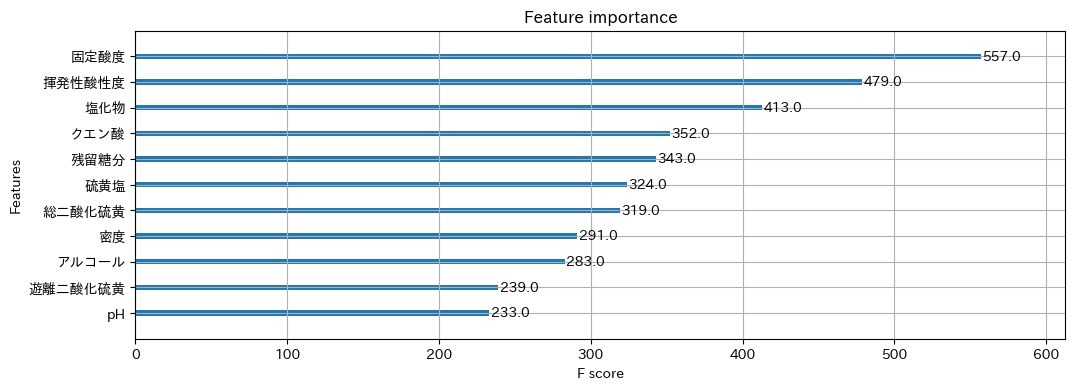

In [97]:
# 生成された全ての木の中にその変数がいくつ分岐として存在するか（平均値）
_, ax = plt.subplots(figsize=(12,4))
xgb.plot_importance(gbdt, ax=ax, importance_type='weight')

In [98]:
#LightGBM
import lightgbm as lgb

def lightgbm_learning(imp_type):
    # データ分割
    X = wine_red.drop(columns='品質', axis=1)
    y = wine_red['品質']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # パラメータ
    lgb_params = {"objective": "regression", "eta": 0.1, "max_depth": 6, "importance_type": imp_type}
    num_rounds = 100

    # LightGBM用のデータセットの作成
    dtrain = lgb.Dataset(X_train, label=y_train)

    # 学習
    lgbdt = lgb.train(lgb_params, dtrain, num_rounds)

    return lgbdt

In [99]:
def plot_feature_importance(df):
    n_features = len(df)
    df_plot = df.sort_values('重要度')
    f_importance_plot = df_plot['重要度'].values
    plt.figure(figsize=[10,4])
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['項目'].values
    plt.yticks(np.arange(n_features), cols_plot)
    plt.xlabel('特徴量重要度')
    plt.ylabel('項目')

In [102]:
# 学習
lgbdt = lightgbm_learning(imp_type='split')

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score 5.646599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [108]:
cols = list(wine_red.drop('品質', axis=1).columns)
f_importance = np.array(lgbdt.feature_importance())
df_importance = pd.DataFrame({'項目':cols, '重要度':f_importance})
df_importance = df_importance.sort_values('重要度', ascending=False)
display(df_importance)

,項目,重要度
1,揮発性酸性度,185
4,塩化物,183
6,総二酸化硫黄,177
7,密度,174
10,アルコール,163
2,クエン酸,152
9,硫黄塩,140
3,残留糖分,137
8,pH,126
0,固定酸度,123


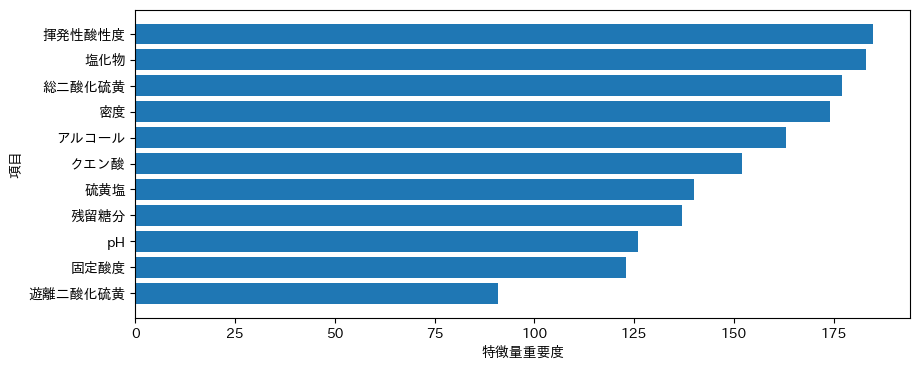

In [109]:
# 重要度の可視化
plot_feature_importance(df_importance)

## 回帰系(Lasso回帰、Ridge回帰, ロジスティック回帰)

In [ ]:
"""
回帰係数（重み）から重要度を算出することができる

メリット
要因分析を行いやすい

デメリット
多重共線性を持つ特徴量に対しては重要度を正しく計測できないことがある。

"""

In [122]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

X = wine_red.drop(columns='品質', axis=1)
y = wine_red['品質']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    return(rmse)

model_lasso = LassoCV().fit(X_train, y_train)
print(f'スコア:{rmse_cv(model_lasso).mean().round(decimals=3)}')

coef = pd.Series(model_lasso.coef_, index  = X_train.columns)
print("選択項目数" + str(sum(coef != 0)) + ", 除外項目数" + str(sum(coef == 0)))

スコア:0.666
選択項目数7, 除外項目数4


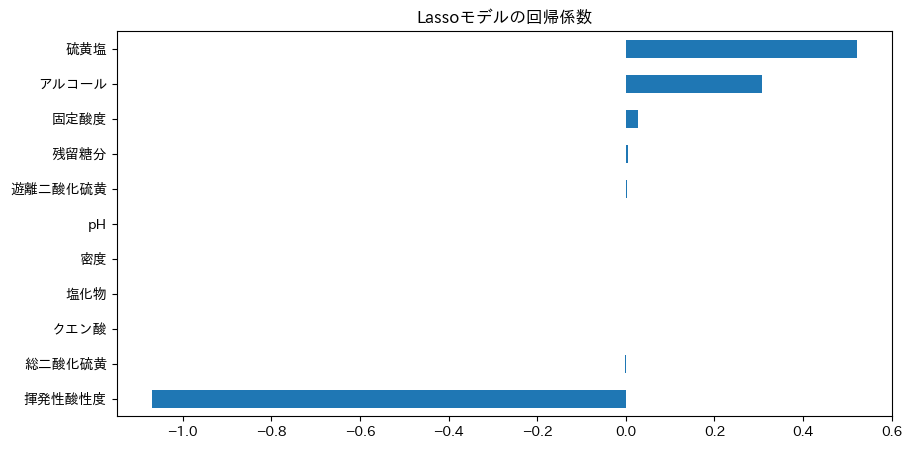

In [125]:
plt.figure(figsize=[10,5])
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Lassoモデルの回帰係数");

In [153]:
# ロジスティック回帰
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# データ分割
X = wine_red.drop(columns='品質', axis=1)
y = wine_red['品質']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#バイプライン make_pipelineはpipelineの簡略
#MInMaxScaler:0~1の値で正規化
pipe_lr = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, C=5.0))
pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'正解率： {accuracy}')
print("="*20)


# 回帰係数
print('回帰係数')
for col in np.argsort(pipe_lr.steps[1][1].coef_[0])[::-1]:
    print("{0}:{1}".format(X.columns[col], pipe_lr.steps[1][1].coef_[0][col].round(decimals=3)))

正解率： 0.6375
回帰係数
揮発性酸性度:5.018
塩化物:1.994
pH:1.199
密度:1.013
残留糖分:0.581
固定酸度:0.179
遊離二酸化硫黄:-0.464
硫黄塩:-0.878
アルコール:-1.278
総二酸化硫黄:-1.409
クエン酸:-1.954


In [149]:
np.argsort(pipe_lr.steps[1][1].coef_[0])[::-1]

array([ 1,  4,  8,  7,  3,  0,  5,  9, 10,  6,  2])

In [154]:
pipe_lr.steps[1][1].coef_[0]

array([ 0.1792635 ,  5.0179779 , -1.95394422,  0.58050552,  1.99350321,
       -0.4639357 , -1.40898239,  1.01288913,  1.19934431, -0.87821524,
       -1.27759716])

選択項目数： 11、除外項目数： 0


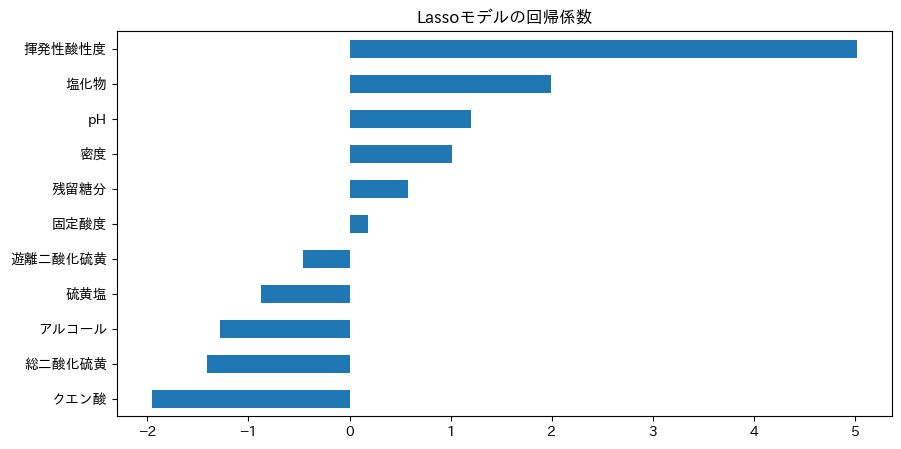

In [155]:
# 回帰係数
coef = pd.Series(pipe_lr.steps[1][1].coef_[0], index = X_train.columns)
imp_coef = coef.sort_values()
print("選択項目数： " + str(sum(coef != 0)) + "、除外項目数： " +  str(sum(coef == 0)))

# 可視化
plt.figure(figsize=[10,5])
imp_coef.plot(kind = "barh")
plt.title("Lassoモデルの回帰係数");

"""
係数の大きさが特徴量の重要度になる？？
"""